<a href="https://colab.research.google.com/github/khaled-delowar/Data-Science-Bootcamp/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install tensorflow


In [5]:
!nvidia-smi

Fri Jan 12 04:08:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [7]:
pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [10]:
 # import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [11]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train'
valid_path = '/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/test'

In [12]:
#Import the inception v3 library
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [13]:
#don't train existing weights
for layer in inception.layers:
  layer.trainable = False

In [16]:
# Useful for getting number of output classes
folders = glob('/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train/*')

In [17]:
folders

['/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train/ulcerative-colitis',
 '/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train/polyps',
 '/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train/normal-z-line',
 '/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train/normal-pylorus',
 '/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train/normal-cecum',
 '/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train/esophagitis',
 '/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train/dyed-lifted-polyps',
 '/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-datas

In [18]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [19]:
prediction = Dense(len(folders), activation='softmax')(x)

In [20]:
# Create the model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# View the structure of model
model.summary()

In [22]:
#tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
)

In [24]:
#Use the Image Data Generator to import the images from the dataset
# Don't apply data Augmentation in test data set apply only train data.
# This is for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [25]:
# make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3201 images belonging to 8 classes.


In [26]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/kvasir-dataset-for-classification-and-segmentation/kvasir-dataset/kvasir-dataset/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 800 images belonging to 8 classes.


In [27]:
#fit the model
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 5,
    steps_per_epoch=len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-27-31ffa243155b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
101/101 [==============================] - 873s 9s/step - loss: 3.9088 - accuracy: 0.6773 - val_loss: 2.4799 - val_accuracy: 0.7387
Epoch 2/5
101/101 [==============================] - 81s 804ms/step - loss: 1.6817 - accuracy: 0.7926 - val_loss: 3.4778 - val_accuracy: 0.7300
Epoch 3/5
101/101 [==============================] - 82s 809ms/step - loss: 1.6380 - accuracy: 0.8332 - val_loss: 2.5691 - val_accuracy: 0.7700
Epoch 4/5
101/101 [==============================] - 84s 828ms/step - loss: 1.3824 - accuracy: 0.8594 - val_loss: 2.8876 - val_accuracy: 0.8062
Epoch 5/5
101/101 [==============================] - 84s 834ms/step - loss: 1.9778 - accuracy: 0.8491 - val_loss: 4.9111 - val_accuracy: 0.7613


In [28]:
import matplotlib.pyplot as plt

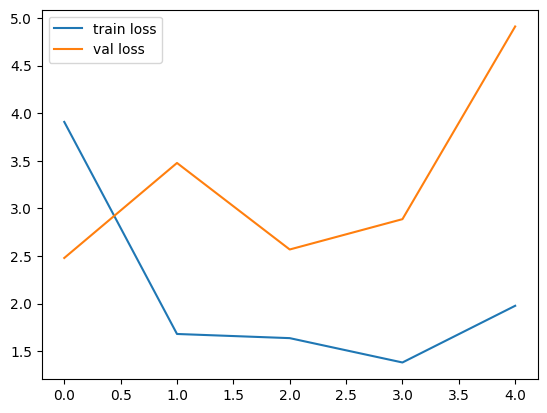

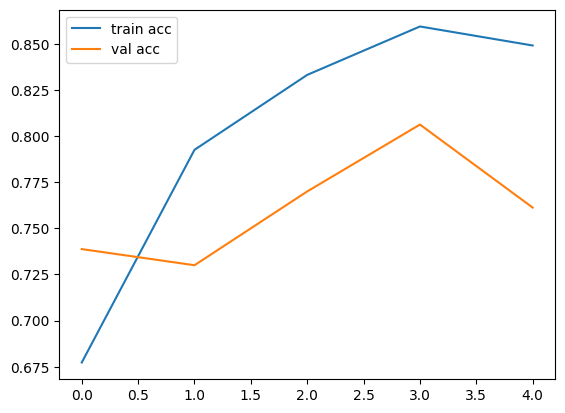

<Figure size 640x480 with 0 Axes>

In [29]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
y_pred = model.predict(test_set)

25/25 [==============================] - 12s 432ms/step


In [32]:
y_pred

array([[6.42904418e-20, 3.26643188e-27, 0.00000000e+00, ...,
        1.14994087e-28, 4.11080351e-18, 1.98076306e-17],
       [6.16760110e-09, 4.41301726e-13, 6.23606801e-01, ...,
        3.76361281e-01, 1.20987066e-18, 1.95325788e-06],
       [1.00000000e+00, 8.08224205e-28, 0.00000000e+00, ...,
        0.00000000e+00, 3.07821124e-13, 6.81045621e-26],
       ...,
       [5.35434672e-16, 1.88899576e-18, 4.56147717e-37, ...,
        2.21996937e-28, 4.24225988e-08, 9.99999404e-01],
       [1.41760025e-36, 0.00000000e+00, 0.00000000e+00, ...,
        4.44822858e-34, 0.00000000e+00, 2.03732223e-36],
       [2.26141171e-17, 2.62429102e-27, 2.63415494e-16, ...,
        9.99999762e-01, 1.30856594e-23, 9.88002060e-17]], dtype=float32)

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
model=load_model('model_inception.h5')

In [ ]:
model.summary()

In [40]:
# Load the best model
model.load_weights("model_inception.h5")

# Evaluate the model
loss, accuracy = model.evaluate(test_set, steps=len(test_set))
print("Loss:", loss)
print("Accuracy:", accuracy)

# Get the predictions
predictions = model.predict(test_set, steps=len(test_set))

# Import the modules
import sklearn.metrics
import numpy as np

# Get the true labels and the predicted labels
y_true = test_set.classes
y_pred = np.argmax(model.predict(test_set), axis=1)

# Calculate the metrics
jaccard = sklearn.metrics.jaccard_score(y_true, y_pred, average=None) # or average='macro' or 'micro'
recall = sklearn.metrics.recall_score(y_true, y_pred, average=None) # or average='macro' or 'micro'
precision = sklearn.metrics.precision_score(y_true, y_pred, average=None) # or average='macro' or 'micro'

# Print or return the metrics
print("Jaccard:", jaccard)
print("Recall:", recall)
print("Precision:", precision)

# Plot the confusion matrix or the classification report
# You can use sklearn.metrics.confusion_matrix or sklearn.metrics.classification_report
# You need to import them first
# You also need to get the true labels from the test_data
# You can use np.argmax to get the index of the highest probability class

25/25 [==============================] - 12s 405ms/step - loss: 4.9111 - accuracy: 0.7613
Loss: 4.911130905151367
Accuracy: 0.7612500190734863
25/25 [==============================] - 9s 375ms/step
Jaccard: [0.09363296 0.01680672 0.03521127 0.08064516 0.09473684 0.07488987
 0.07386364 0.09392265]
Recall: [0.25 0.02 0.05 0.15 0.18 0.17 0.13 0.17]
Precision: [0.13020833 0.0952381  0.10638298 0.14851485 0.16666667 0.11805556
 0.14606742 0.17346939]


In [41]:
import cv2
""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, y_pred, save_image_path):

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)
    y_pred = y_pred * 255

    line = np.ones((H, 10, 3)) * 255

    cat_images = np.concatenate([image, line, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)

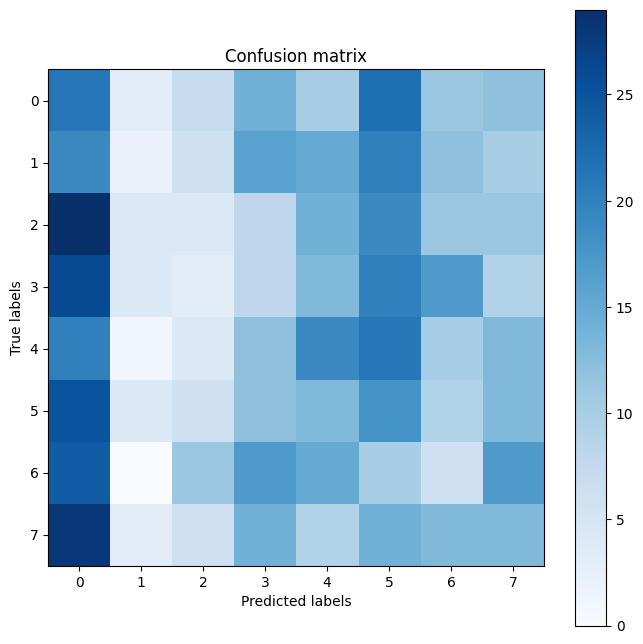

In [43]:
# Import the modules
import sklearn.metrics
import matplotlib.pyplot as plt

# Get the true labels
y_true = test_set.classes

# Get the predicted labels
y_pred = np.argmax(predictions, axis=1)

np.save("predictions.npy", predictions)
# Calculate the confusion matrix or the classification report
cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
cr = sklearn.metrics.classification_report(y_true, y_pred)

# Plot the confusion matrix or the classification report
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

1/1 [==============================] - 2s 2s/step


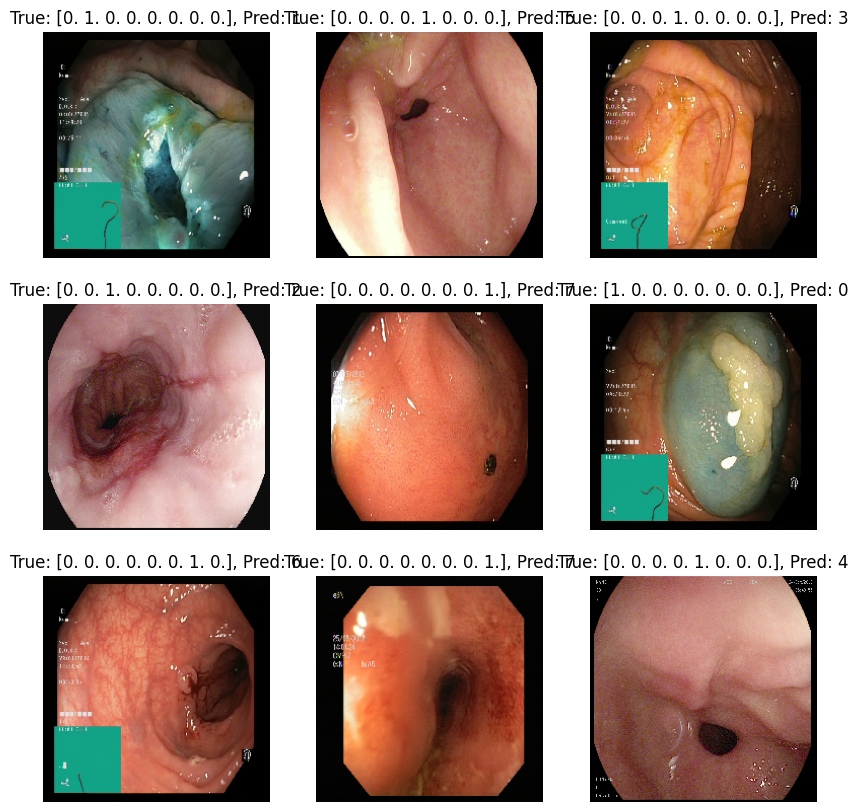

In [44]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

# Get the images and labels from the test data generator
images, labels = next(test_set)

# Get the predicted classes from the model
predictions = model.predict(images)
pred_classes = np.argmax(predictions, axis=1)


# Plot the images and their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(array_to_img(images[i]))
    plt.title(f"True: {labels[i]}, Pred: {pred_classes[i]}")
    plt.axis("off")
plt.show()

In [49]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score

# Import numpy
import numpy as np

# Convert y_predict to a one-dimensional array of integers
#y_predict = np.argmax(y_predict, axis=1)

# Calculate confusion matrix
'''cm = confusion_matrix(y_test, y_predict)



# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, color='green', label='PR curve (area = %0.2f)' % pr_auc)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()
'''
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print F1 score
print('F1 score: %0.2f' % f1)

# Calculate accuracy score
acc = accuracy_score(y_test,y_pred)

# Print accuracy score
print('Accuracy score: %0.2f' % acc)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].